/var/folders/b7/zsjw9l1579bg90by892m2zj00000gn/T/ipykernel_61782/577605754.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


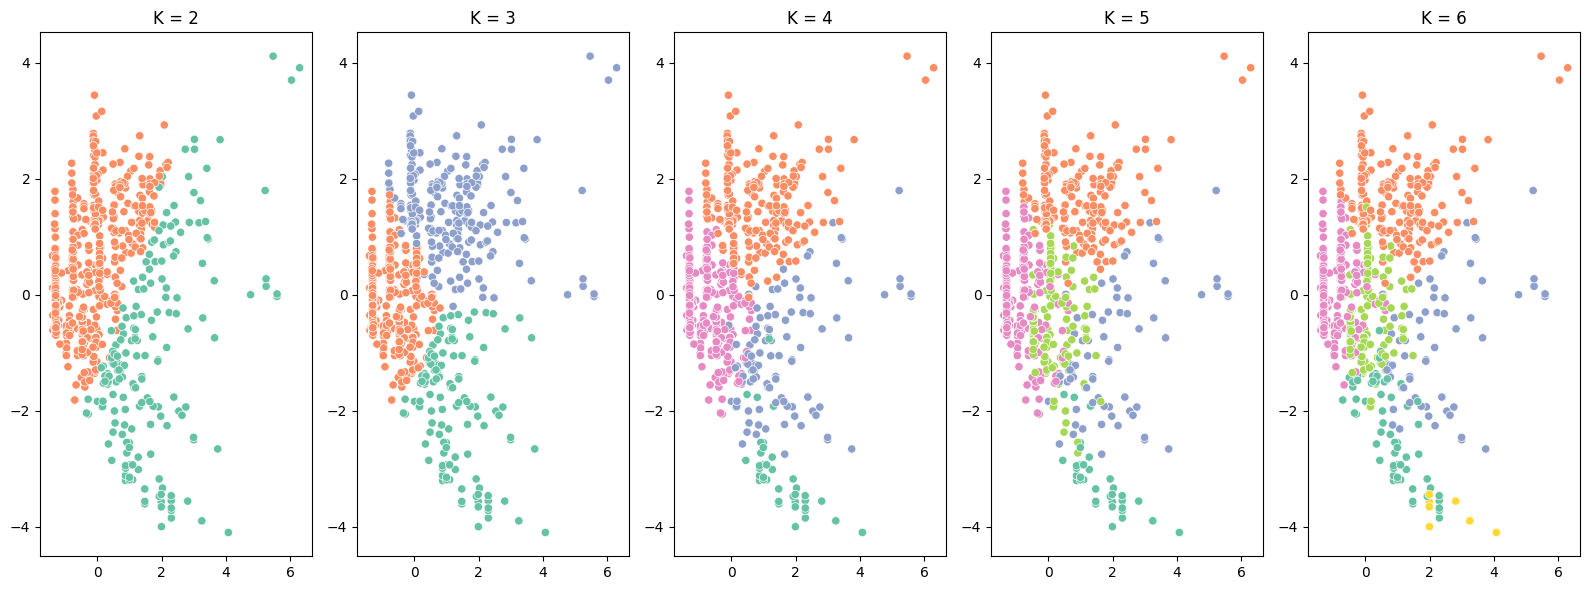

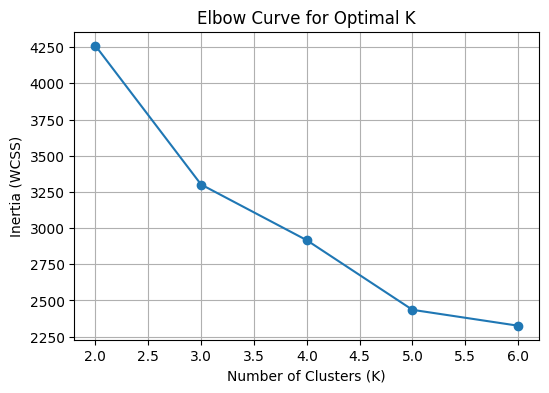

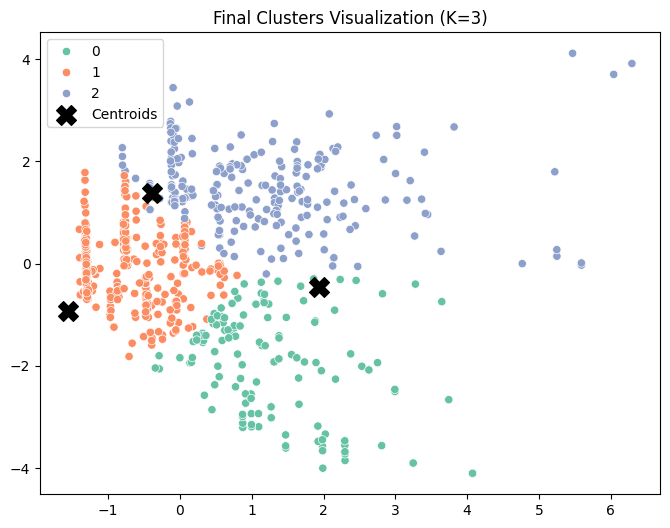

Cluster-wise Feature Means:

           Pclass       Sex        Age       Fare     SibSp     Parch
Cluster                                                              
0        2.639098  0.631579  16.772556  32.235306  1.977444  1.774436
1        2.764818  0.235182  28.330631  11.972242  0.200765  0.055449
2        1.106383  0.455319  38.780851  77.213493  0.417021  0.319149

Cluster 0 - Gender Distribution:
Sex
1    63.16%
0    36.84%
Name: proportion, dtype: object

Cluster 1 - Gender Distribution:
Sex
0    76.48%
1    23.52%
Name: proportion, dtype: object

Cluster 2 - Gender Distribution:
Sex
0    54.47%
1    45.53%
Name: proportion, dtype: object

Survival Rate by Cluster:
Cluster
0    48.12%
1    25.24%
2    62.13%
Name: Survived, dtype: object


/var/folders/b7/zsjw9l1579bg90by892m2zj00000gn/T/ipykernel_61782/577605754.py:90: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_full['Age'].fillna(df_full['Age'].median(), inplace=True)


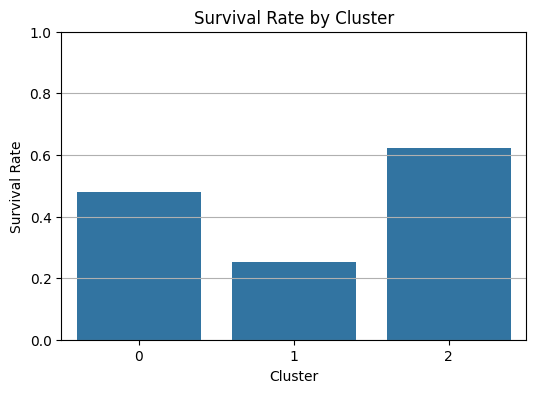

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Step 1: Load the Titanic dataset
df = pd.read_csv("/Users/shriyog/Documents/SEM6/DMPM/LAB ESE/dataset/titanic.csv")

# Step 2: Basic preprocessing
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

# Encode categorical variable 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Step 3: Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 4: Apply PCA for visualization (2D)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Step 5: K-Means clustering and plot for different values of K
inertia = []
K_range = range(2, 7)

plt.figure(figsize=(16, 6))

for i, k in enumerate(K_range, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    inertia.append(kmeans.inertia_)

    # Plot clusters in 2D
    plt.subplot(1, 5, i)
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='Set2', legend=None)
    plt.title(f'K = {k}')

plt.tight_layout()
plt.show()

# Step 6: Elbow Method Plot
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Curve for Optimal K')
plt.grid(True)
plt.show()

# Refit KMeans with K=3
kmeans_final = KMeans(n_clusters=3, random_state=42)
clusters = kmeans_final.fit_predict(scaled_data)

# Plot final clusters with centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='Set2')
centroids = kmeans_final.cluster_centers_
centroids_2d = PCA(n_components=2).fit_transform(centroids)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title("Final Clusters Visualization (K=3)")
plt.legend()
plt.show()




# Add cluster labels back to original DataFrame
df_clustered = df.copy()
df_clustered['Cluster'] = clusters

# Analyze mean values per cluster
cluster_summary = df_clustered.groupby('Cluster').mean()
print("Cluster-wise Feature Means:\n")
print(cluster_summary)

# Optional: show distribution of genders in each cluster
for c in sorted(df_clustered['Cluster'].unique()):
    print(f"\nCluster {c} - Gender Distribution:")
    print(df_clustered[df_clustered['Cluster'] == c]['Sex'].value_counts(normalize=True).map("{:.2%}".format))

# Reload full dataset to include 'Survived'
df_full = pd.read_csv("/Users/shriyog/Documents/SEM6/DMPM/LAB ESE/dataset/titanic.csv")
df_full['Age'].fillna(df_full['Age'].median(), inplace=True)
df_full['Sex'] = df_full['Sex'].map({'male': 0, 'female': 1})
df_full = df_full[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Survived']]
df_full['Cluster'] = clusters

# Analyze survival rate per cluster
survival_by_cluster = df_full.groupby('Cluster')['Survived'].mean()
print("\nSurvival Rate by Cluster:")
print(survival_by_cluster.map("{:.2%}".format))

# Optional: Plot survival distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=survival_by_cluster.index, y=survival_by_cluster.values)
plt.ylabel("Survival Rate")
plt.xlabel("Cluster")
plt.title("Survival Rate by Cluster")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()
